## Data Preparation

In [1]:
## Read data
library(readxl)
data.all = read_excel("./raw_response_data.xlsx",sheet ="sheet1") 
data.all$Group=ifelse(data.all$Group=='High_2nd',1,0) #group variable : 1(High_2nd), 0(Mid_1st)
data=data.all[,3:33] #delete columns except group variable & item response 

# Delete meaningless response
obs.out1=which(apply(data[2:31],1,var)==0) # answering same number for all items   
obs.out2=which((data[,'A1']-(6-data[,'G1'])>3) | (data[,'A1']-(6-data[,'G1']) < (-3))) # check responses for similar items A1 & G1 
obs.out3=which((data[,'B1']-data[,'E2']>3) | (data[,'B1']-data[,'E2'] < (-3))) #check responses for similar items B1 & E2
obs.out=c(obs.out1, obs.out2, obs.out3)
data=data[-obs.out,]

#reverse item (1:positive, 5: negative) -> change direction 
reverse.item = c('A2','B4','C1','D2','D3','F1','F2','G1','G3','G4','G5','G6')
for(item in reverse.item){data[,item] = 6-data[,item]}
head(data)

Group,A1,A2,A3,B1,B2,B3,B4,C1,C2,⋯,F3,F4,F5,G1,G2,G3,G4,G5,G6,G7
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,3,3,3,3,3,3,4,⋯,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,⋯,3,3,3,3,3,3,3,3,3,3
1,3,2,4,5,5,4,1,5,2,⋯,4,4,3,1,3,2,2,3,2,3
1,3,4,3,4,2,3,4,3,4,⋯,4,3,3,3,2,4,3,4,4,3
1,2,1,5,5,5,5,1,1,5,⋯,4,3,4,3,5,2,2,3,2,4
1,4,2,5,2,3,3,3,4,5,⋯,3,2,4,2,1,2,3,1,3,3


## Basic Statistics

In [8]:
# item response data 
resdata = data[2:31]

In [9]:
# Average 
item.mean=apply(resdata,2,mean)
data.frame(item.mean)

,item.mean
,<dbl>
A1,3.159341
A2,2.593407
A3,3.219780
B1,3.109890
B2,3.109890
B3,3.318681
B4,2.840659
C1,3.434066
C2,3.615385


In [10]:
# Variation
item.var=apply(resdata,2,var)
data.frame(item.var)

,item.var
,<dbl>
A1,1.2507134
A2,1.2812823
A3,1.5094408
B1,1.4353713
B2,1.5458685
B3,1.5111408
B4,1.3722603
C1,1.3740817
C2,1.0446239


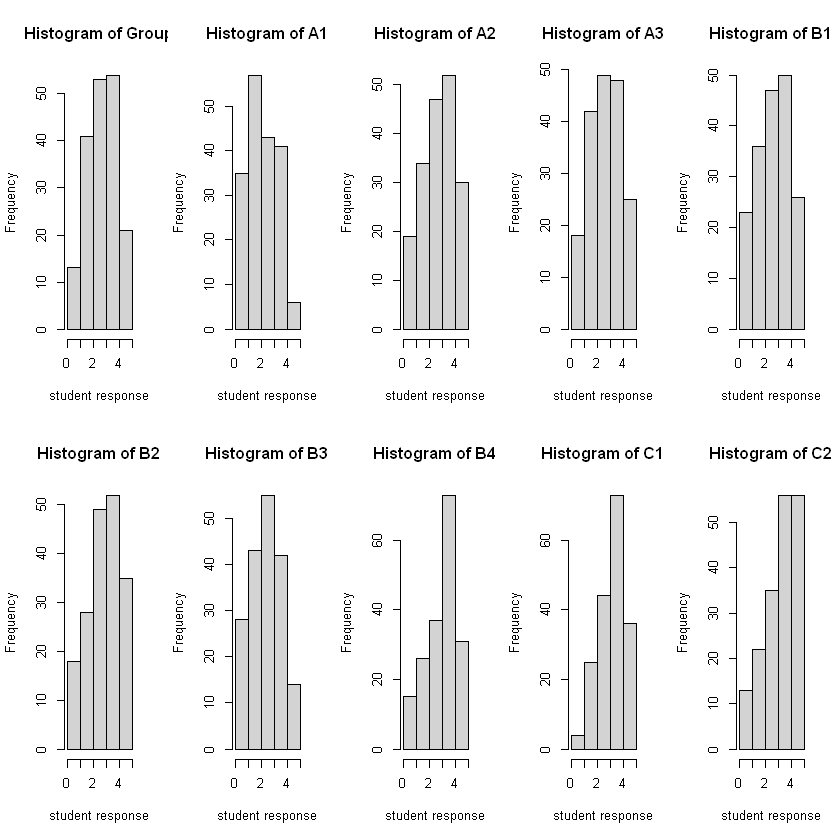

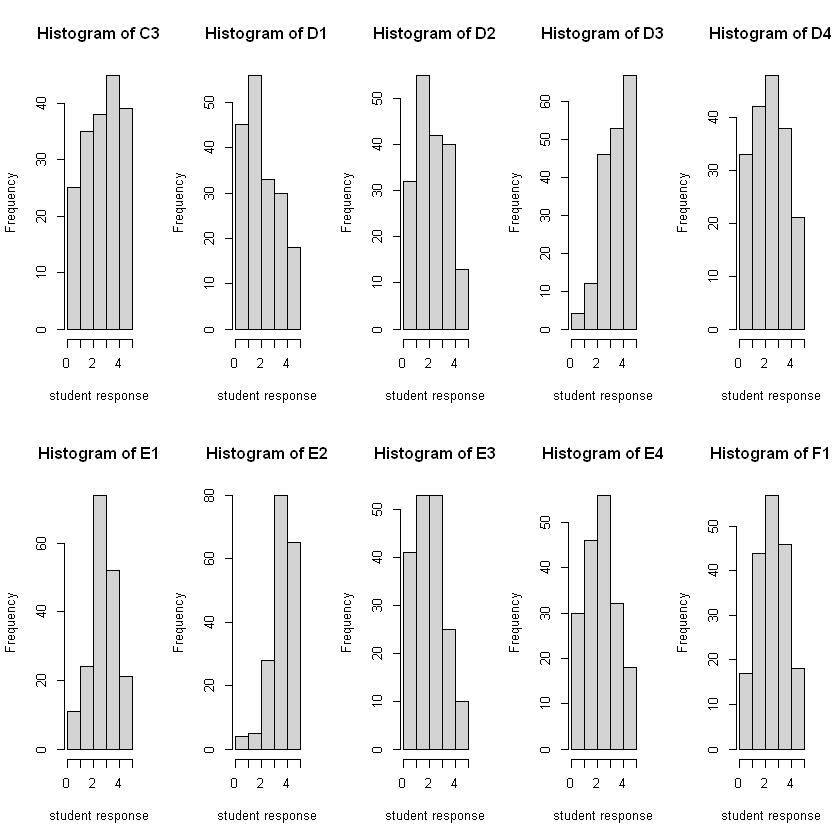

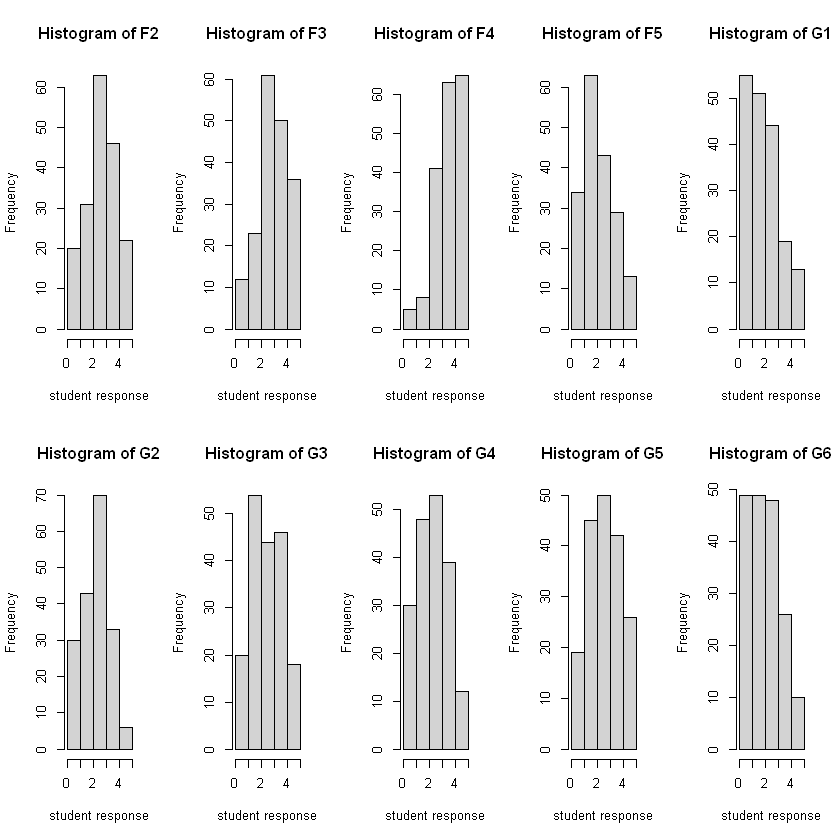

In [12]:
# Distribution 
par(mfrow=c(2,5))
for(i in 1:10){
  hist(resdata[[i]], breaks=c(0,1,2,3,4,5), main=paste("Histogram of",colnames(data)[i]), xlab="student response")
}
for(i in 11:20){
  hist(resdata[[i]], breaks=c(0,1,2,3,4,5), main=paste("Histogram of",colnames(data)[i]), xlab="student response")
}
for(i in 21:30){
  hist(resdata[[i]], breaks=c(0,1,2,3,4,5), main=paste("Histogram of",colnames(data)[i]), xlab="student response")
}
par(mfrow=c(1,1))

# EFA

In [13]:
install.packages('psych')
library(psych)

Installing package into 'C:/Users/ANN/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpWgmutR\downloaded_packages


### EFA appropriateness verification

In [28]:
# Kaiser-Meyer-Olkin test 
KMO(cor(resdata, use = "complete.obs")) 


── Kaiser-Meyer-Olkin criterion (KMO) ──────────────────────────────────────────────────────────────────────────────────

✔ The overall KMO value for your data is meritorious.
  These data are probably suitable for factor analysis.

  Overall: 0.833

  For each variable:
   A1    A2    A3    B1    B2    B3    B4    C1    C2    C3    D1    D2    D3 
0.857 0.775 0.887 0.866 0.844 0.888 0.638 0.614 0.487 0.858 0.917 0.927 0.738 
   D4    E1    E2    E3    E4    F1    F2    F3    F4    F5    G1    G2    G3 
0.780 0.889 0.869 0.675 0.827 0.804 0.799 0.850 0.846 0.775 0.870 0.779 0.824 
   G4    G5    G6    G7 
0.856 0.796 0.649 0.865 

In [29]:
# Bartlett's test of sphericity
library(EFAtools)
BARTLETT(cor(resdata, use = "complete.obs"), N=182)  #p<0.001 : significant


✔ The Bartlett's test of sphericity was significant at an alpha level of .05.
  These data are probably suitable for factor analysis.

  𝜒²(435) = 1642.07, p < .001

#### <span style="color:red"> Result | </span>  According to both method, these data are probably suitable for factor analysis.


### Number of Factors 

Parallel analysis suggests that the number of factors =  4  and the number of components =  4 


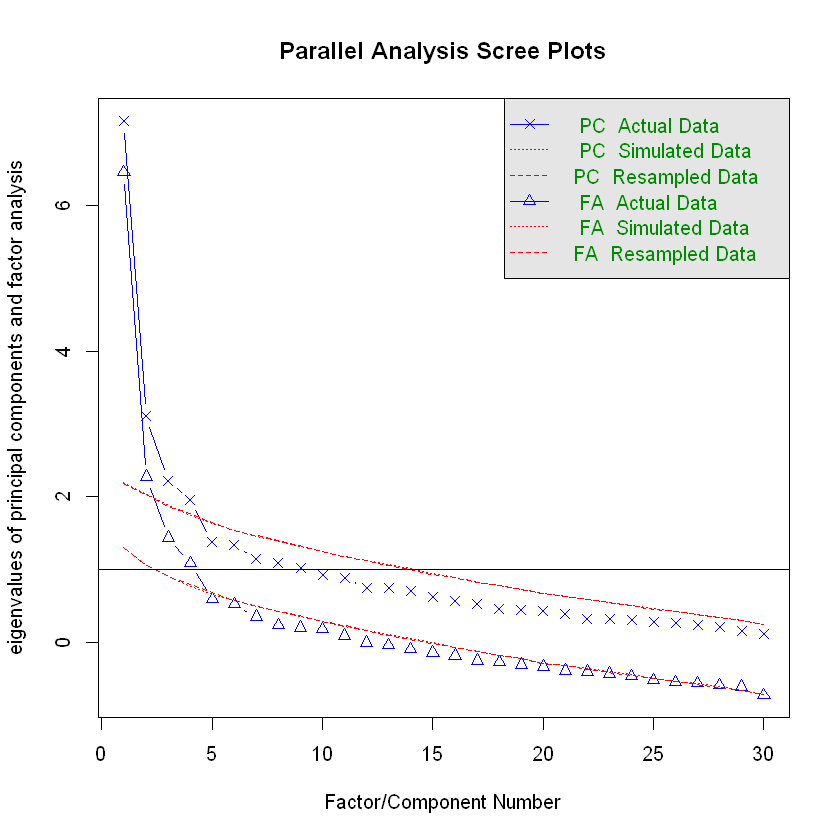

In [17]:
#Scree Method 
pout=fa.parallel(data1) #제안 요인수 = 4 : 기존 검사 구성과 일치 

&rarr; **Correspond with the test developement**


Very Simple Structure
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = plot, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.62  with  1  factors
VSS complexity 2 achieves a maximimum of 0.74  with  3  factors

The Velicer MAP achieves a minimum of 0.02  with  3  factors 
BIC achieves a minimum of  -1139.03  with  2  factors
Sample Size adjusted BIC achieves a minimum of  -83.94  with  6  factors

Statistics by number of factors 
  vss1 vss2   map dof chisq    prob sqresid  fit RMSEA   BIC SABIC complex
1 0.62 0.00 0.026 405   761 5.1e-24    31.6 0.62 0.093 -1109   171     1.0
2 0.59 0.73 0.021 376   596 3.2e-12    22.3 0.73 0.076 -1139    49     1.2
3 0.51 0.74 0.018 348   484 1.9e-06    17.6 0.79 0.061 -1122   -23     1.6
4 0.47 0.73 0.018 321   413 4.0e-04    14.1 0.83 0.052 -1069   -55     1.8
5 0.46 0.68 0.019 295   359 6.1e-03    12.4 0.85 0.045 -1002   -70     2.1
6 0.47 0.70 0.020 270   309 5.0e-0

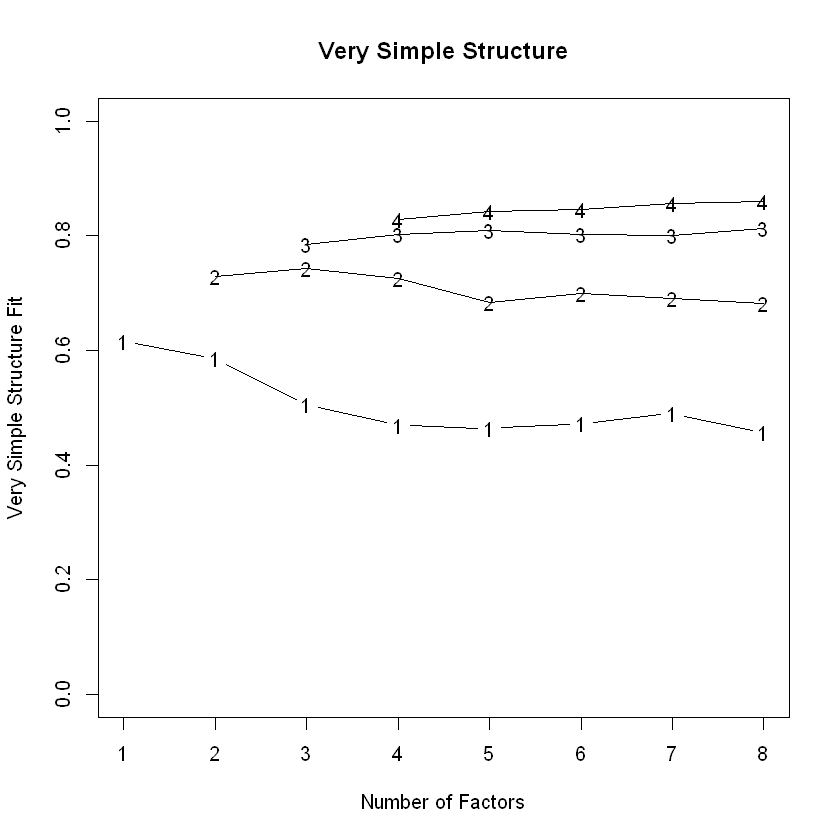

In [18]:
#VSS and MAP
vout=VSS(data1) 
vout  

#### <span style="color:red"> Result | </span>  According to Scree method, 4 factors are appropriate and this result corresponds with the test development. 
#### However, VSS and MAP suggested to use 3 factors, hence, I treated both cases. 

### Factor Extraction & Rotation

In [19]:
library(GPArotation)

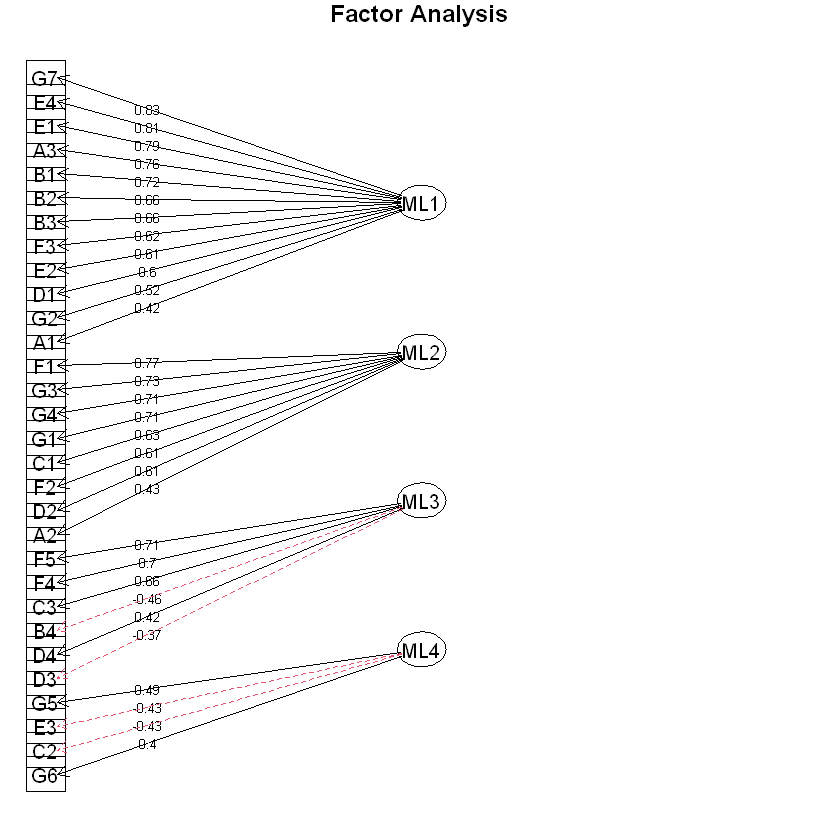

In [20]:
#Case1: 4 factors / ML with Covariance Matrix / Orthogonal Rotation 

MLout_4fac_var<-fa(r=cov(data1, use = "complete.obs"),nfactors=4,n.obs = 182,fm="ml",rotate="varimax", covar=TRUE)
fa.diagram(MLout_4fac_var, cut=0.2, digits=2)

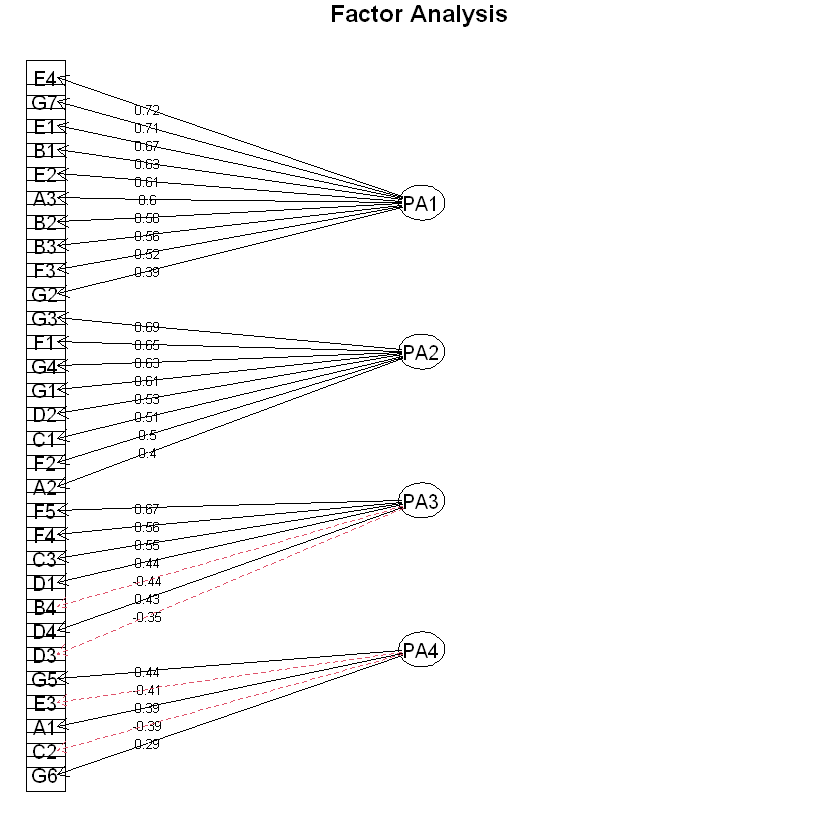

In [21]:
#Case2 : 4 factors / PA with Covariance Matrix / Orthogonal Rotation
PAout_4fac_var<-fa(r=cor(data1, use = "complete.obs"),nfactors=4,n.obs = 182,fm="pa",rotate="varimax", covar=TRUE)
fa.diagram(PAout_4fac_var, cut=0.2, digits=2)

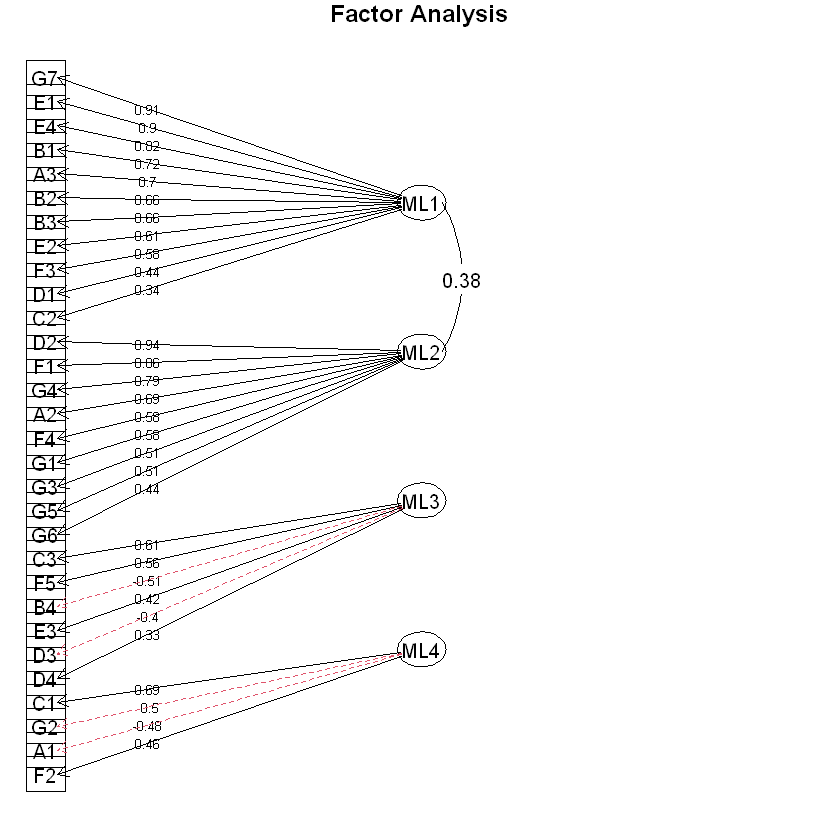

In [22]:
#Case3 : 4 factors / ML with Cov-Mat / Oblique Rotation 
MLout_4fac_obl<-fa(r=cov(data1, use = "complete.obs"),nfactors=4,n.obs = 182,fm="ml",rotate="oblimin", covar=TRUE)
fa.diagram(MLout_4fac_obl, cut=0.2, digits=2)

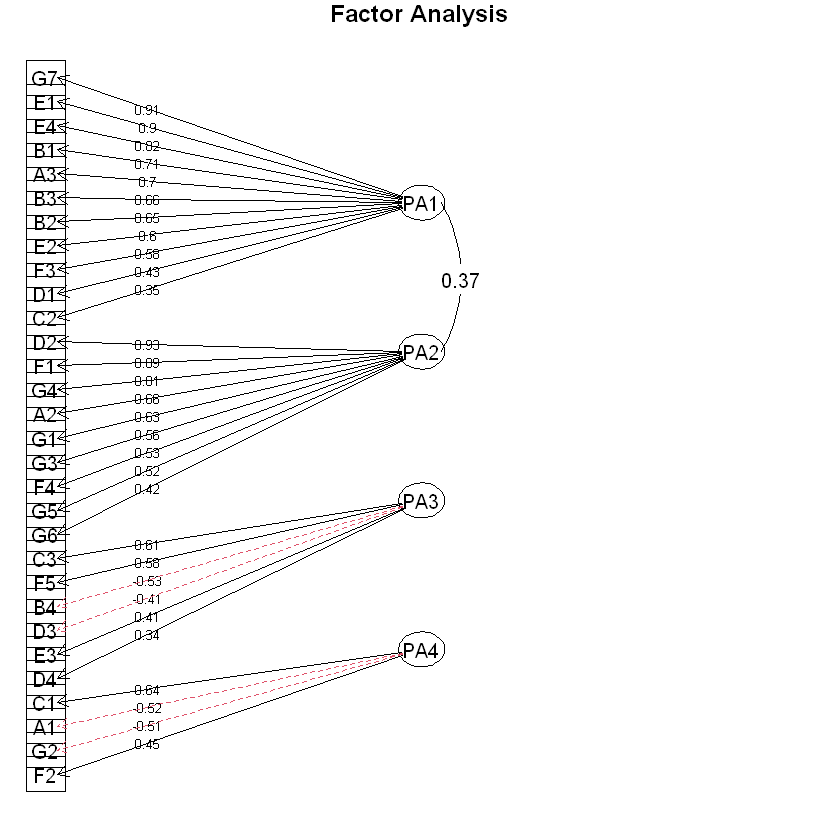

In [23]:
#Case4 : 4 factors / PA with Cov-Mat / Oblique Rotation
PAout_4fac_obl<-fa(r=cov(data1, use = "complete.obs"),nfactors=4,n.obs = 182,fm="pa",rotate="oblimin", covar=TRUE)
fa.diagram(PAout_4fac_obl, cut=0.2, digits=2)

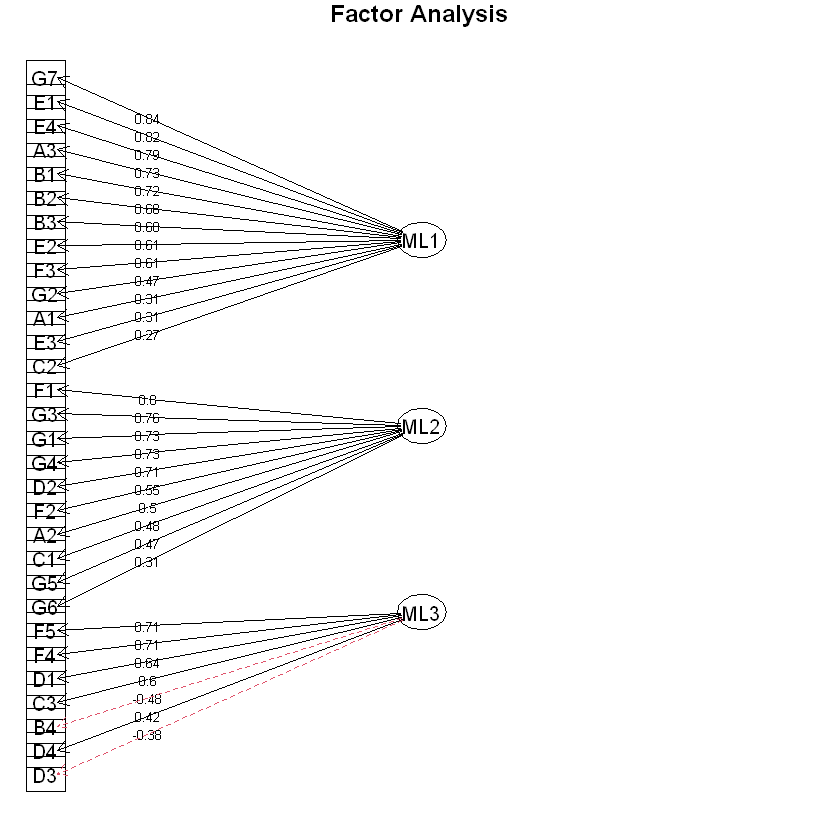

In [24]:
#Case5 : 3 factors / ML with Cov-Mat / Orthogonal Rotation 
MLout_3fac_var<-fa(r=cov(data1, use = "complete.obs"),nfactors=3,n.obs = 182,fm="ml",rotate="varimax", covar=TRUE)
fa.diagram(MLout_3fac_var, cut=0.2, digits=2)

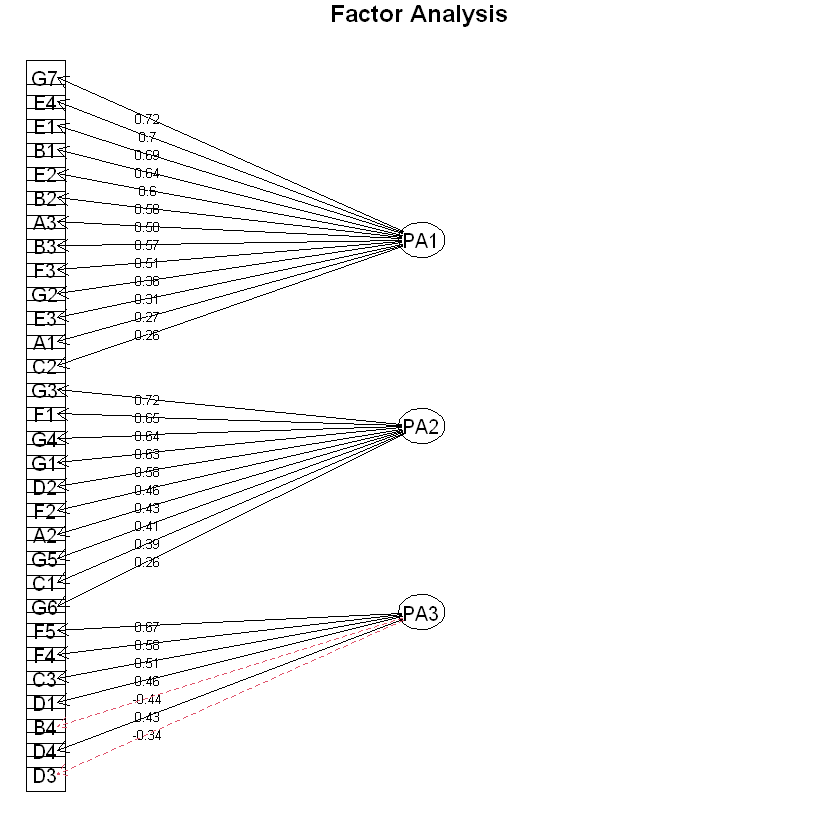

In [25]:
#Case 6: 3 factors / PA with Cov-Mat / Orthogonal Rotation 
PAout_3fac_var<-fa(r=cor(data1, use = "complete.obs"),nfactors=3,n.obs = 182,fm="pa",rotate="varimax", covar=TRUE)
fa.diagram(PAout_3fac_var, cut=0.2, digits=2)

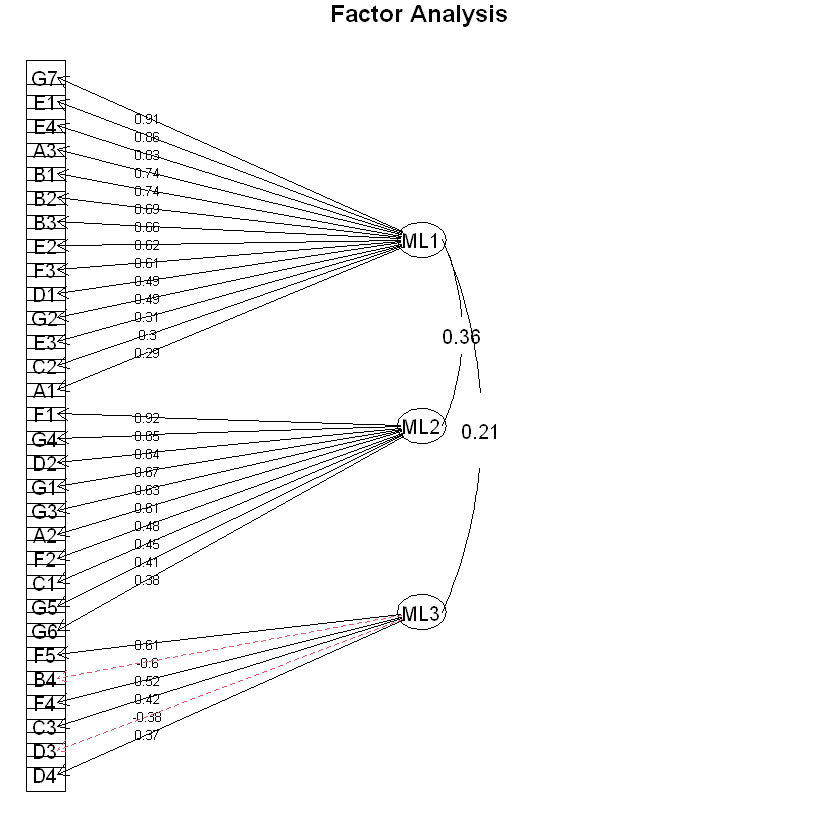

In [26]:
#Case 7: 3 factors/ ML with Cov-Mat / Oblique Rotation 
MLout_3fac_obl<-fa(r=cov(data1, use = "complete.obs"),nfactors=3,n.obs = 182,fm="ml",rotate="oblimin", covar=TRUE)
fa.diagram(MLout_3fac_obl, cut=0.2, digits=2)


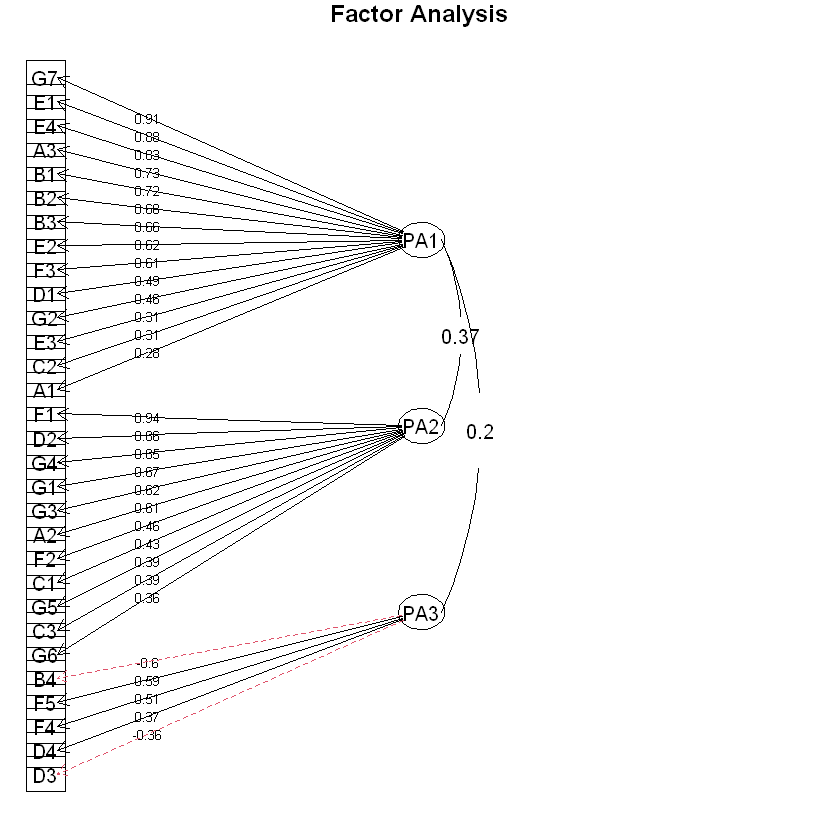

In [27]:
#Case 8: 3 factors / PA with Cov-Mat / Oblique Rotation 
PAout_3fac_obl<-fa(r=cov(data1, use = "complete.obs"),nfactors=3,n.obs = 182,fm="pa",rotate="oblimin", covar=TRUE)
fa.diagram(PAout_3fac_obl, cut=0.2, digits=2)

#### <span style="color:red"> Result | </span>  Although we first assumed 4 attributes for this test, we decide to use 3 factors for next step, instead of 4 original factors, becuase the results from case 1~4 told us the data cannot distinguish two of original factors that we assumed. 
#### We use these EFA results for reference, instead, we did a qualitative analysis for each items and re-organized attributes. 
